### Importing Libraries :-

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('HR.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Identifying object columns :-

In [5]:
a=[]
for i in data.columns[data.dtypes == 'object']:
    a.append(i)
a

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Identifying columns having same data :-

In [7]:
temp = []
for col in data.columns:
    if len(data[col].unique()) == 1 or len(data[col].unique()) == 1470:
        temp.append(col)
temp      

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

### Applying LabelEncoding :-

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[a]=data[a].apply(le.fit_transform)

In [9]:
data=data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [10]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Checking IMBALENCING in target column :-

In [11]:
data.groupby(['Attrition']).count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
1,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237


<AxesSubplot:xlabel='Attrition', ylabel='count'>

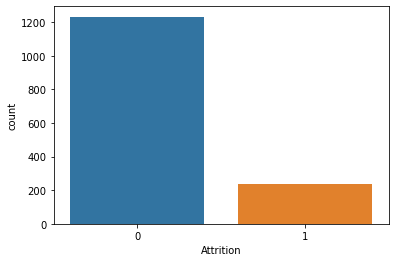

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data,x='Attrition')

Target coiumn is imbalenced

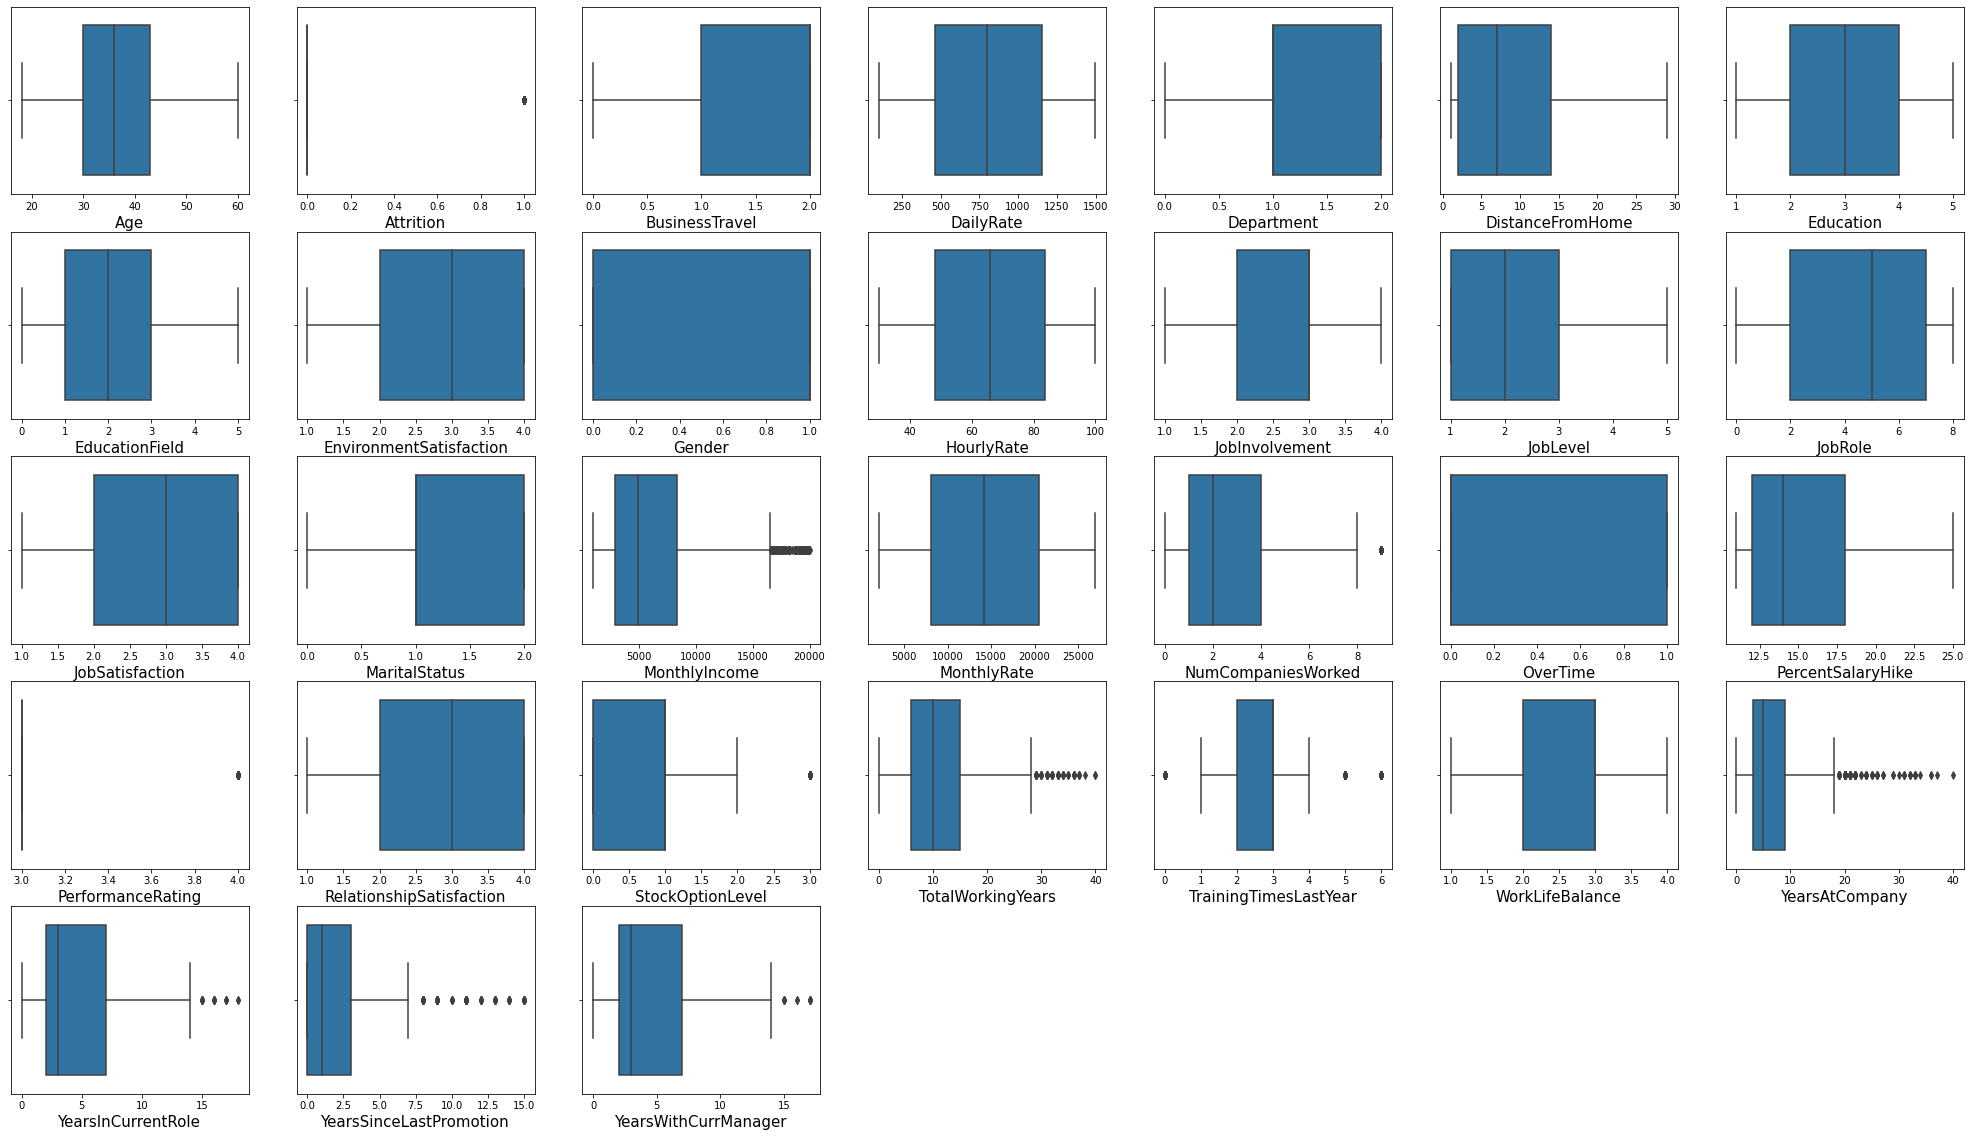

In [13]:
plt.figure(figsize=(35,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=36:
        ax=plt.subplot(5,7,plotnumber)
        sns.boxplot(data[i],orient='vericle')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

Columns 'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' have outliers.

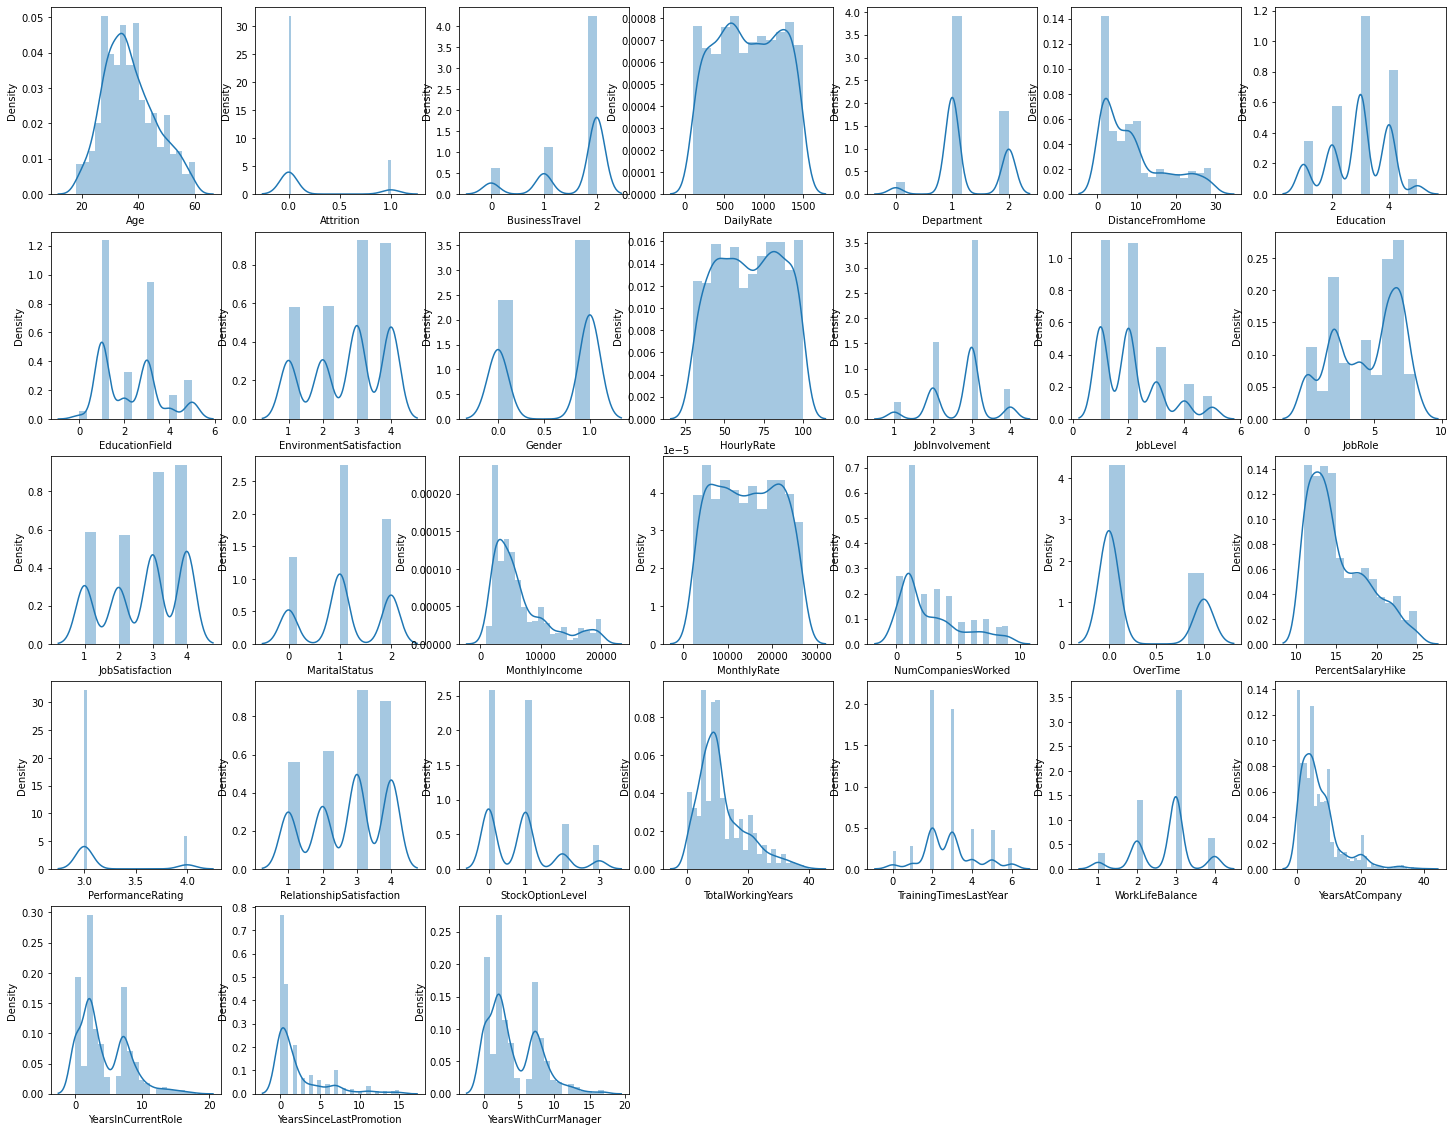

In [14]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    if plotnumber<=37:
        plt.subplot(5,7,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

### removing outliers :-

In [15]:
q=data['MonthlyIncome'].quantile(.98) #keep 98% and remove 2% off data
data=data[data['MonthlyIncome']<q]

q=data['TotalWorkingYears'].quantile(.95)
data=data[data['TotalWorkingYears']<q]

q=data['TrainingTimesLastYear'].quantile(.98)
data=data[data['TrainingTimesLastYear']<q]

q=data['YearsAtCompany'].quantile(.98)
data=data[data['YearsAtCompany']<q]

q=data['YearsInCurrentRole'].quantile(.98)
data=data[data['YearsInCurrentRole']<q]

q=data['YearsSinceLastPromotion'].quantile(.98)
data=data[data['YearsSinceLastPromotion']<q]
        
q=data['YearsWithCurrManager'].quantile(.98)
data=data[data['YearsWithCurrManager']<q]

In [16]:
data.shape

(1176, 31)

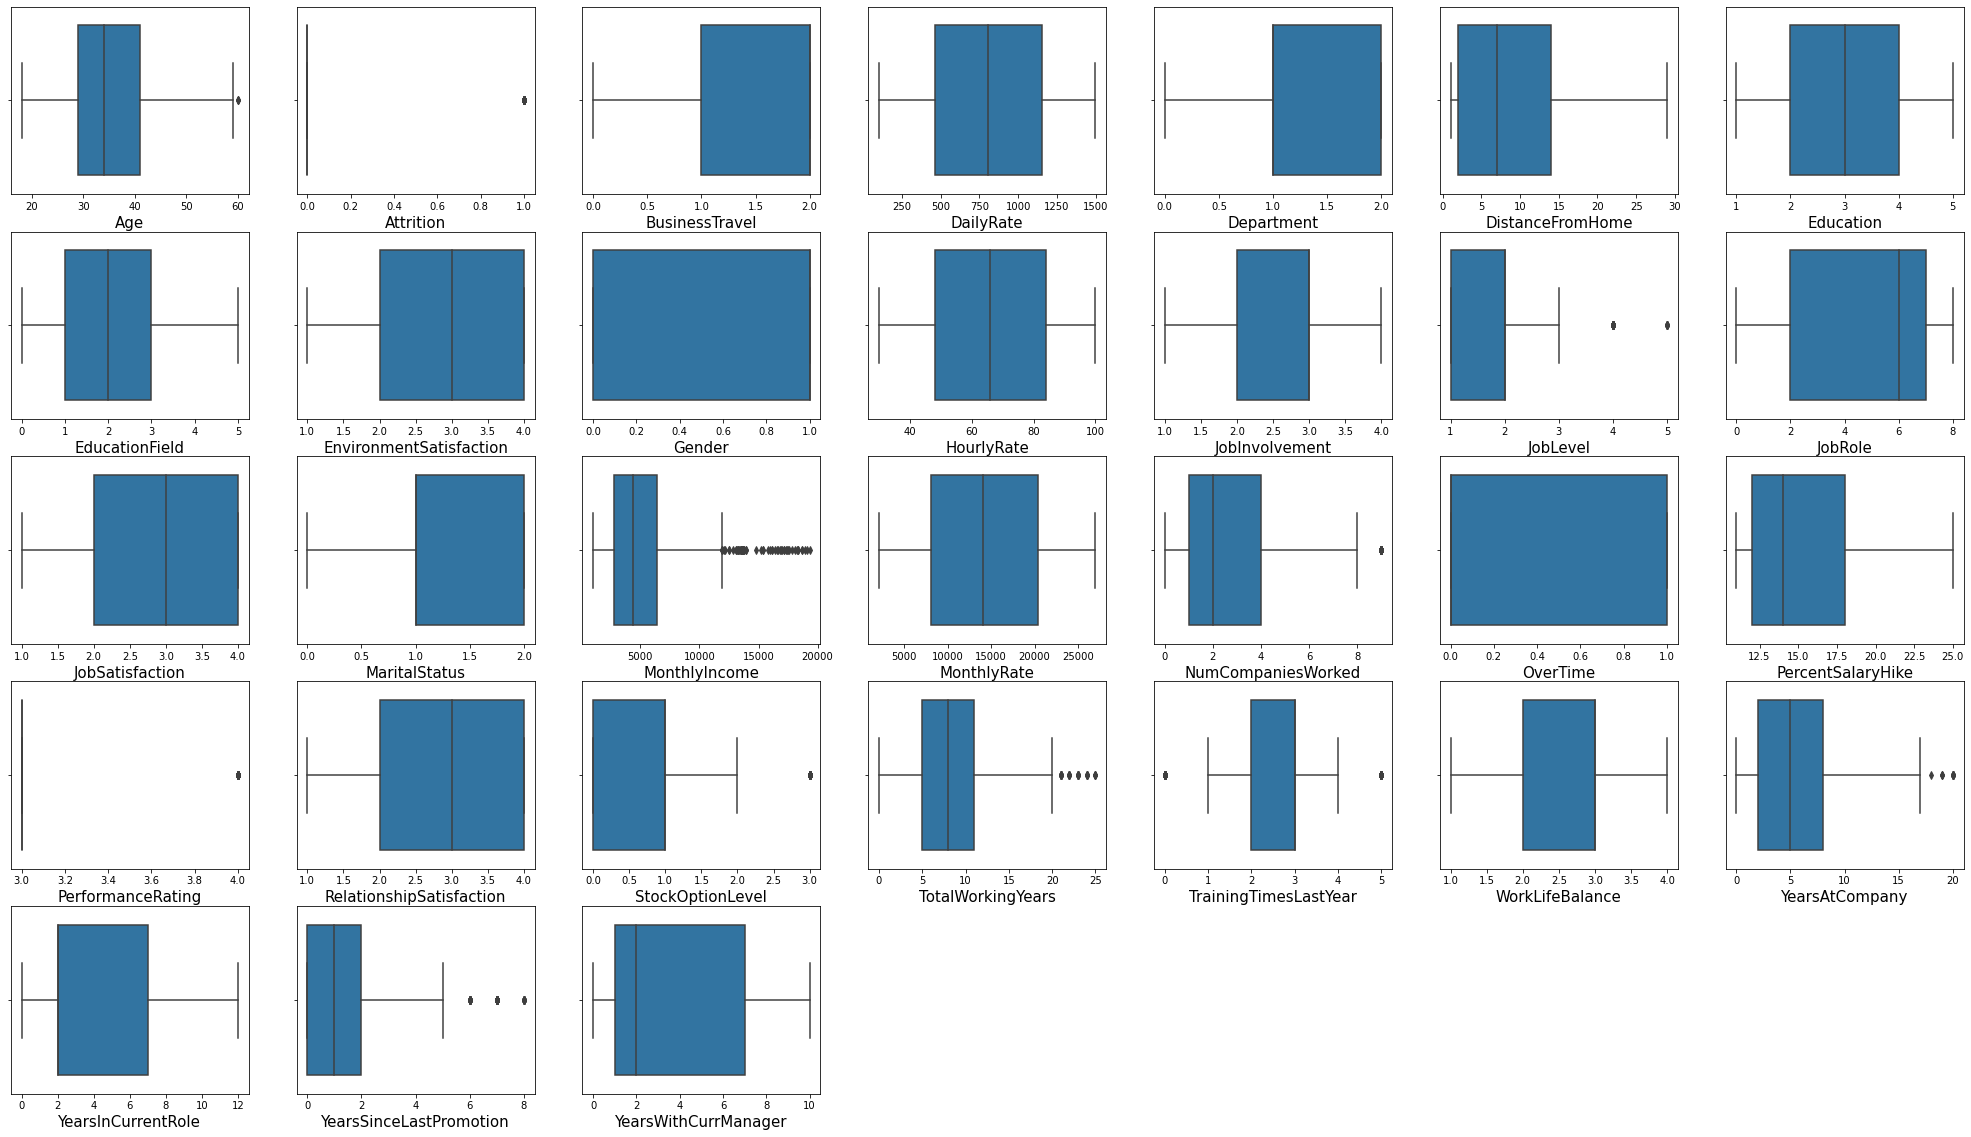

In [17]:
plt.figure(figsize=(35,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=36:
        ax=plt.subplot(5,7,plotnumber)
        sns.boxplot(data[i],orient='vericle')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

### Seperating feature and target columns :-

In [18]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

### Balencing Data :-

In [19]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
print(y_over.value_counts())

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.25)

1    964
0    964
Name: Attrition, dtype: int64


### Scaling Data :-

In [20]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x_over)

### model implementation :-

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Libraries for model selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 

### Best random state :-

In [22]:

max_=0
maxr=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_over,test_size=.25,random_state=i) # passed non scaled data because in decisiontree there is no need of scale data
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>max_:
        max_=acc
        maxr=i
print('max accuracy score:',max_,'\nmax random state:',maxr)

max accuracy score: 0.8609958506224067 
max random state: 54


In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1446, 30), (1446,), (482, 30), (482,))

In [24]:
# LogisticRegression model  
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Result by LogisticRegression')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by LogisticRegression

accuracy score: 0.8153526970954357

classification report:

               precision    recall  f1-score   support

           0       0.79      0.83      0.81       228
           1       0.84      0.80      0.82       254

    accuracy                           0.82       482
   macro avg       0.82      0.82      0.82       482
weighted avg       0.82      0.82      0.82       482

confusioon matrix:
 [[189  39]
 [ 50 204]]


In [25]:
# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Result by Decision Tree Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by Decision Tree Classifier

accuracy score: 0.7531120331950207

classification report:

               precision    recall  f1-score   support

           0       0.74      0.73      0.74       228
           1       0.76      0.78      0.77       254

    accuracy                           0.75       482
   macro avg       0.75      0.75      0.75       482
weighted avg       0.75      0.75      0.75       482

confusioon matrix:
 [[166  62]
 [ 57 197]]


In [26]:
# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
print('Result by KNeighbors Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by KNeighbors Classifier

accuracy score: 0.8402489626556017

classification report:

               precision    recall  f1-score   support

           0       0.95      0.70      0.81       228
           1       0.78      0.97      0.86       254

    accuracy                           0.84       482
   macro avg       0.87      0.83      0.83       482
weighted avg       0.86      0.84      0.84       482

confusioon matrix:
 [[159  69]
 [  8 246]]


In [27]:
# Support Vector Classifier model
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Result by Support Vector Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by Support Vector Classifier

accuracy score: 0.8734439834024896

classification report:

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       228
           1       0.91      0.84      0.87       254

    accuracy                           0.87       482
   macro avg       0.87      0.88      0.87       482
weighted avg       0.88      0.87      0.87       482

confusioon matrix:
 [[208  20]
 [ 41 213]]


In [28]:
# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Result by RandomForest Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by RandomForest Classifier

accuracy score: 0.8983402489626556

classification report:

               precision    recall  f1-score   support

           0       0.86      0.94      0.90       228
           1       0.94      0.86      0.90       254

    accuracy                           0.90       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.90      0.90      0.90       482

confusioon matrix:
 [[215  13]
 [ 36 218]]


In [29]:
# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
print('Result by AdaBoost Classifier')
print('\naccuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n\n',classification_report(y_test,pred))
print('confusioon matrix:\n',confusion_matrix(y_test,pred))

Result by AdaBoost Classifier

accuracy score: 0.8526970954356846

classification report:

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       228
           1       0.89      0.83      0.86       254

    accuracy                           0.85       482
   macro avg       0.85      0.85      0.85       482
weighted avg       0.86      0.85      0.85       482

confusioon matrix:
 [[201  27]
 [ 44 210]]


## cross validation :-

In [30]:
m=[lr,dtc,knc,svc,rfc,abc] #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x_scaled,y_over,cv=15)
    print(i)
    print('cross validation score:',scr_.mean(),'\n')

LogisticRegression()
cross validation score: 0.8274265180878554 

DecisionTreeClassifier()
cross validation score: 0.7817869832041343 

KNeighborsClassifier()
cross validation score: 0.8371447028423772 

SVC()
cross validation score: 0.8875968992248062 

RandomForestClassifier()
cross validation score: 0.9057251291989664 

AdaBoostClassifier()
cross validation score: 0.8652575904392764 



## comparing models 

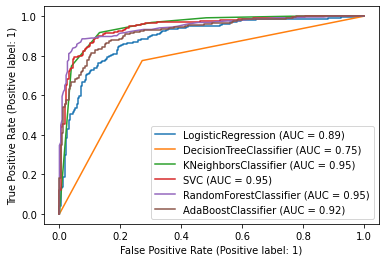

In [31]:
 
# Library for metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve 

disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [32]:
#hyperparameter tuning for rfc
parameters={'n_estimators':[7,10,13,15], # n_estimators':[7,10,13,15] for how many models you want to make
    'criterion':['entropy','gini'],
    'max_depth':[10],
    'min_samples_split':[10,11],
    'min_samples_leaf':[5,6]}

gs=GridSearchCV(rfc,parameters)
gs.fit(x_train,y_train)
print('\n--------------------------RandomForest Classifier Hyperparameter Tuning------------------')
print('best estimators:\n',gs.best_estimator_)

rfc_=gs.best_estimator_ # direct applying best estimators
rfc_.fit(x_train,y_train)
pred=rfc_.predict(x_test)
print(f'\n\naccuracy score:{accuracy_score(y_test,pred)*100:.2f}%\n')
print(f'\nconfusion_matrix:\n{confusion_matrix(y_test,pred)}\n')
print(f'\nclassification_report:\n{pd.DataFrame(classification_report(y_test,pred,output_dict=True))}')


--------------------------RandomForest Classifier Hyperparameter Tuning------------------
best estimators:
 RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=10)


accuracy score:83.82%


confusion_matrix:
[[198  30]
 [ 48 206]]


classification_report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.804878    0.872881  0.838174    0.838880      0.840714
recall       0.868421    0.811024  0.838174    0.839722      0.838174
f1-score     0.835443    0.840816  0.838174    0.838130      0.838275
support    228.000000  254.000000  0.838174  482.000000    482.000000


Random forest classifier is the best model

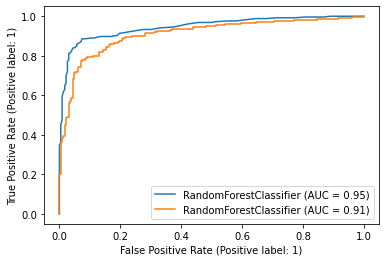

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve 

disp=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(rfc_,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

## saving the final model

In [34]:

import pickle
filename='red_wine_best.pkl'
pickle.dump(rfc_,open(filename,'wb'))